In [2]:
%load_ext itikz

# References

In programming, particularly in languages like Python, lists are mutable objects. This means that when you pass a list to a function (as a parameter), you're passing a reference to the original list, not a copy of it. This has significant implications, particularly in terms of side effects. Understanding these effects is crucial for writing reliable and maintainable code.


## Variable and immutable values

In Python, variables do not directly contain values as they might in some other programming languages. Instead, a variable holds a reference to a value that is stored somewhere in memory. To better understand this concept, imagine that the Python interpreter manages two distinct spaces:

The **Namespace** (Left Space): This is the space that is directly accessible to the user. It contains the variables that have been defined in your program. You can think of it as a map where variable names are the keys, and these keys point to objects in the memory.

The **Memory Space** (Right Space): This is where the actual values are stored. This space is not directly accessible to the user but is managed internally by the interpreter. When you assign a value to a variable, the variable in the namespace becomes a reference or pointer to an object in this memory space.

Consider the following assignment:

```python
x = 5
```

Here’s what happens behind the scenes:
- The interpreter creates an integer object with the value 5 in the memory space.
- A variable x is created in the namespace and is assigned a reference to the memory location where the value 5 is stored.

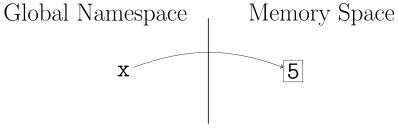

In [2]:
%%itikz --file-prefix itikz- --implicit-pic --temp-dir
\usetikzlibrary{patterns,snakes}

\tikzstyle{every node}=[font=\Huge]


\node (L) at (-4, -1) {Global Namespace};
\node (L) at (4, -1) {Memory Space};
\node (sep1) at (0, -1) {};
\node (sep2) at (0, -5) {};
\draw [thick] (sep1) -- (sep2) node (1) {};


\node (x) at (-3, -3) {\tt x};
\node[rectangle, draw] (5) at (3, -3) {\tt 5};

\draw [->] (x) to [out=20,in=160] (5);

Let's continue with `y = 10`.

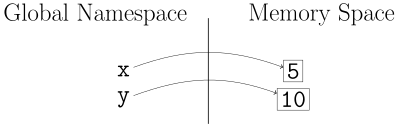

In [3]:
%%itikz --file-prefix itikz- --implicit-pic --temp-dir
\usetikzlibrary{patterns,snakes} 

\tikzstyle{every node}=[font=\Huge]


\node (L) at (-4, -1) {Global Namespace};
\node (L) at (4, -1) {Memory Space};
\node (sep1) at (0, -1) {};
\node (sep2) at (0, -5) {};
\draw [thick] (sep1) -- (sep2) node (1) {};


\node (x) at (-3, -3) {\tt x};
\node[rectangle, draw] (5) at (3, -3) {\tt 5};
\draw [->] (x) to [out=20,in=160] (5);

\node (y) at (-3, -4) {\tt y};
\node[rectangle, draw] (10) at (3, -4) {\tt 10};
\draw [->] (y) to [out=20,in=160] (10);

What happens when we execute the following instruction `y = x`? The right-hand side of the equation is evaluated first. We retrieve the value associated with the variable `x`. Then, the variable `y` will be assigned this same value. Both variables will point to the same data. The value `10` is no longer referenced and will eventually be removed from memory by a mechanism known as the **garbage collector** (see [](glossary:garbage-collector)).

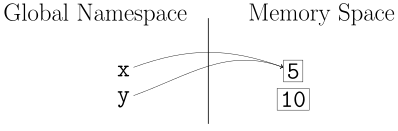

In [4]:
%%itikz --file-prefix itikz- --implicit-pic --temp-dir
\usetikzlibrary{patterns,snakes}

\tikzstyle{every node}=[font=\Huge]


\node (L) at (-4, -1) {Global Namespace};
\node (L) at (4, -1) {Memory Space};
\node (sep1) at (0, -1) {};
\node (sep2) at (0, -5) {};
\draw [thick] (sep1) -- (sep2) node (1) {};


\node (x) at (-3, -3) {\tt x};
\node[rectangle, draw] (5) at (3, -3) {\tt 5};
\draw [->] (x) to [out=20,in=160] (5);

\node (y) at (-3, -4) {\tt y};
\node[rectangle, draw] (10) at (3, -4) {\tt 10};
\draw [->] (y) to [out=20,in=160] (5);

Let’s now assume we define a function `inc`. It takes a parameter and returns the value of this parameter incremented by `1`.

```python
def inc(x):
    x = x+1
    return x
```

What is the effect of this definition on memory? As we have seen, functions can be manipulated like variables, and everything works in a similar way. A variable `inc` is created in the namespace, and a function object is added to the memory space.


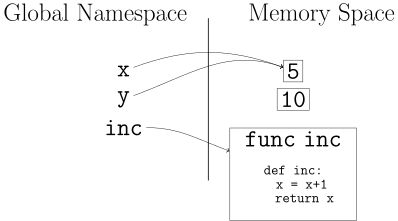

In [5]:
%%itikz --file-prefix itikz- --implicit-pic --temp-dir
\usetikzlibrary{patterns,snakes}

\tikzstyle{every node}=[font=\Huge]


\node (L) at (-4, -1) {Global Namespace};
\node (L) at (4, -1) {Memory Space};
\node (sep1) at (0, -1) {};
\node (sep2) at (0, -7) {};
\draw [thick] (sep1) -- (sep2) node (1) {};


\node (x) at (-3, -3) {\tt x};
\node[rectangle, draw] (5) at (3, -3) {\tt 5};
\draw [->] (x) to [out=20,in=160] (5);

\node (y) at (-3, -4) {\tt y};
\node[rectangle, draw] (10) at (3, -4) {\tt 10};
\draw [->] (y) to [out=20,in=160] (5);

\node (inc) at (-3, -5) {\tt inc};
\node[text centered,text width = 0.35\textwidth, text depth = 2.5 cm,
    draw,below of=3,anchor=north] (finc) at (3, -4) {\tt func inc};
\draw [->] (inc) to [out=0,in=160] (finc);
\node (d1) at (3, -6.5) {\Large \tt def inc:};
\node (d2) at (3.3, -7) {\Large \tt x = x+1};
\node (d3) at (3.4, -7.5) {\Large \tt return x};

When we call the `inc` function, the interpreter retrieves the object associated with the `inc` variable. This object contains the instructions that will be executed. Let’s try to observe with our diagram what happens when the instruction `x = inc(x)` is called...

First, a local name space is created when the function is called. The parameter `x` is created and assigned the value `5`. This parameter is a local variable that masks the `x` variable in the global name space.

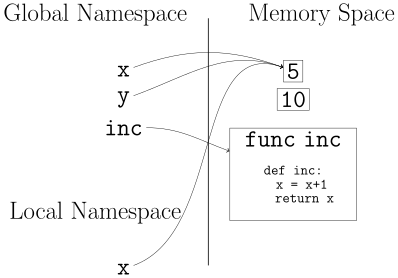

In [6]:
%%itikz --file-prefix itikz- --implicit-pic --temp-dir
\usetikzlibrary{patterns,snakes}

\tikzstyle{every node}=[font=\Huge]


\node (L) at (-4, -1) {Global Namespace};
\node (L) at (4, -1) {Memory Space};
\node (sep1) at (0, -1) {};
\node (sep2) at (0, -10) {};
\draw [thick] (sep1) -- (sep2) node (1) {};


\node (x) at (-3, -3) {\tt x};
\node[rectangle, draw] (5) at (3, -3) {\tt 5};
\draw [->] (x) to [out=20,in=160] (5);

\node (y) at (-3, -4) {\tt y};
\node[rectangle, draw] (10) at (3, -4) {\tt 10};
\draw [->] (y) to [out=20,in=160] (5);

\node (inc) at (-3, -5) {\tt inc};
\node[text centered,text width = 0.35\textwidth, text depth = 2.5 cm,
    draw,below of=3,anchor=north] (finc) at (3, -4) {\tt func inc};
\draw [->] (inc) to [out=0,in=160] (finc);
\node (d1) at (3, -6.5) {\Large \tt def inc:};
\node (d2) at (3.3, -7) {\Large \tt x = x+1};
\node (d3) at (3.4, -7.5) {\Large \tt return x};

\node (L) at (-4, -8) {Local Namespace};

\node (x) at (-3, -10) {\tt x};
\draw [->] (x) to [out=20,in=160] (5);


After executing the first line of the function `x = x+1`, we obtain the following diagram.

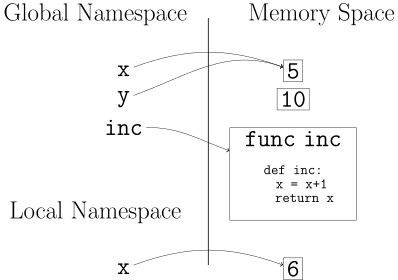

In [3]:
%%itikz --file-prefix itikz- --implicit-pic --temp-dir
\usetikzlibrary{patterns,snakes}

\tikzstyle{every node}=[font=\Huge]


\node (L) at (-4, -1) {Global Namespace};
\node (L) at (4, -1) {Memory Space};
\node (sep1) at (0, -1) {};
\node (sep2) at (0, -10) {};
\draw [thick] (sep1) -- (sep2) node (1) {};


\node (x) at (-3, -3) {\tt x};
\node[rectangle, draw] (5) at (3, -3) {\tt 5};
\draw [->] (x) to [out=20,in=160] (5);

\node (y) at (-3, -4) {\tt y};
\node[rectangle, draw] (10) at (3, -4) {\tt 10};
\draw [->] (y) to [out=20,in=160] (5);

\node (inc) at (-3, -5) {\tt inc};
\node[text centered,text width = 0.35\textwidth, text depth = 2.5 cm,
    draw,below of=3,anchor=north] (finc) at (3, -4) {\tt func inc};
\draw [->] (inc) to [out=0,in=160] (finc);
\node (d1) at (3, -6.5) {\Large \tt def inc:};
\node (d2) at (3.3, -7) {\Large \tt x = x+1};
\node (d3) at (3.4, -7.5) {\Large \tt return x};

\node (L) at (-4, -8) {Local Namespace};

\node (x2) at (-3, -10) {\tt x};
\node[rectangle, draw] (6) at (3, -10) {\tt 6};
\draw [->] (x2) to [out=20,in=160] (6);

Let’s recall that we are observing the execution of the following instruction.

```python
x = 5
y = x

def inc(x):
    x = x+1
    return x

x = inc(x)
```

At the moment the `return` statement is executed, the value associated with the local variable `x` is used to replace the function call `inc(x)`. The global variable `x` is then assigned the value referenced by the local variable `x`, which is `6`. Finally, the local memory namespace of the function call is destroyed.


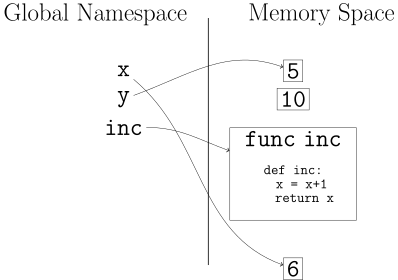

In [8]:
%%itikz --file-prefix itikz- --implicit-pic --temp-dir
\usetikzlibrary{patterns,snakes}

\tikzstyle{every node}=[font=\Huge]


\node (L) at (-4, -1) {Global Namespace};
\node (L) at (4, -1) {Memory Space};
\node (sep1) at (0, -1) {};
\node (sep2) at (0, -10) {};
\draw [thick] (sep1) -- (sep2) node (1) {};


\node (x) at (-3, -3) {\tt x};
\node[rectangle, draw] (5) at (3, -3) {\tt 5};


\node (y) at (-3, -4) {\tt y};
\node[rectangle, draw] (10) at (3, -4) {\tt 10};
\draw [->] (y) to [out=20,in=160] (5);

\node (inc) at (-3, -5) {\tt inc};
\node[text centered,text width = 0.35\textwidth, text depth = 2.5 cm,
    draw,below of=3,anchor=north] (finc) at (3, -4) {\tt func inc};
\draw [->] (inc) to [out=0,in=160] (finc);
\node (d1) at (3, -6.5) {\Large \tt def inc:};
\node (d2) at (3.3, -7) {\Large \tt x = x+1};
\node (d3) at (3.4, -7.5) {\Large \tt return x};

\node[rectangle, draw] (6) at (3, -10) {\tt 6};
\draw [->] (x) to [out=-40,in=160] (6);

So far, everything is relatively clear, and there are no issues because values like 5, 6, or 10 are immutable...

## Variable and Mutable Values

If everything we’ve seen is clear, then the following should be as well, but you should understand why we need to be cautious with mutable values and function calls.

Let’s imagine we have the following code and use the same diagram to observe memory behavior.

```python
l = [0, 1, 2, 3]
h = l

def inc(k):
    k[0] += 1
    
inc(l)
```

After executing the first three instructions, we have the following state.

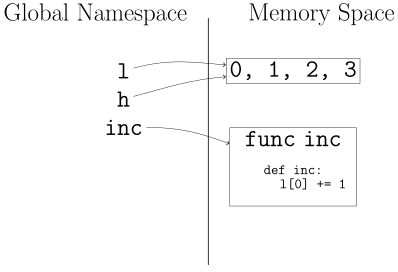

In [9]:
%%itikz --file-prefix itikz- --implicit-pic --temp-dir

% !!! Bug connu de merde, le rendu est pas le bon


\usetikzlibrary{patterns,snakes}
\tikzstyle{every node}=[font=\Huge]


\node (L) at (-4, -1) {Global Namespace};
\node (L) at (4, -1) {Memory Space};
\node (sep1) at (0, -1) {};
\node (sep2) at (0, -10) {};
\draw [thick] (sep1) -- (sep2) node (1) {};

\node (l) at (-3, -3) {\tt l};
\node[rectangle, draw] (0) at (3, -3) {\tt 0, 1, 2, 3};
\draw [->] (l) to [out=15,in=175] (0);

\node (h) at (-3, -4) {\tt h};
\draw [->] (h) to [out=15,in=185] (0);

\node (inc) at (-3, -5) {\tt inc};
\node[text centered,text width = 0.35\textwidth, text depth = 2 cm,
    draw,below of=3,anchor=north] (finc) at (3, -4) {\tt func inc};
\draw [->] (inc) to [out=0,in=160] (finc);
\node (d1) at (3, -6.5) {\Large \tt def inc:};
\node (d2) at (3.7, -7) {\Large \tt l[0] += 1};


When the function `inc(l)` is called, a local variable is created, and it is clear that the only existing list is modified. The value of the first element changes from `0` to `1`.

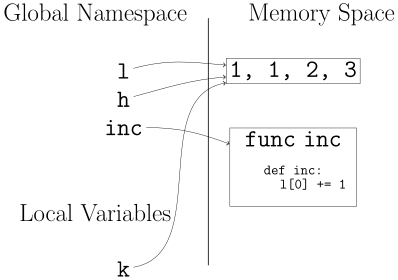

In [10]:
%%itikz --file-prefix itikz- --implicit-pic --temp-dir

% !!! Bug connu de merde, le rendu est pas le bon


\usetikzlibrary{patterns,snakes}
\tikzstyle{every node}=[font=\Huge]


\node (L) at (-4, -1) {Global Namespace};
\node (L) at (4, -1) {Memory Space};
\node (sep1) at (0, -1) {};
\node (sep2) at (0, -10) {};
\draw [thick] (sep1) -- (sep2) node (1) {};

\node (l) at (-3, -3) {\tt l};
\node[rectangle, draw] (0) at (3, -3) {\tt 1, 1, 2, 3};
\draw [->] (l) to [out=15,in=175] (0);

\node (h) at (-3, -4) {\tt h};
\draw [->] (h) to [out=15,in=185] (0);

\node (inc) at (-3, -5) {\tt inc};
\node[text centered,text width = 0.35\textwidth, text depth = 2 cm,
    draw,below of=3,anchor=north] (finc) at (3, -4) {\tt func inc};
\draw [->] (inc) to [out=0,in=160] (finc);
\node (d1) at (3, -6.5) {\Large \tt def inc:};
\node (d2) at (3.7, -7) {\Large \tt l[0] += 1};

\node (L) at (-4, -8) {Local Variables};

\node (k) at (-3, -10) {\tt k};
\draw [->] (k) to [out=10,in=190] (0);

If we want different behavior, we need to start the `inc` function by duplicating the list (using a slice) and, importantly, return the new list. We obtain the following code.

```python
l = [0, 1, 2, 3]
h = l

def inc(k):
    k = k[:]
    k[0] += 1
    return k
    
l = inc(l)
```

After executing this code, `l = [1, 1, 2, 3]` and `h = [0, 1, 2, 3]`.

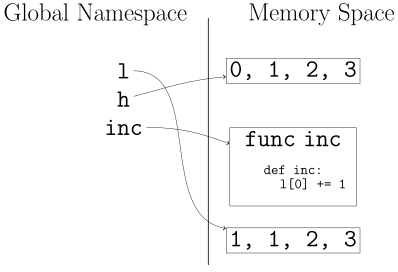

In [11]:
%%itikz --file-prefix itikz- --implicit-pic --temp-dir

% !!! Bug connu de merde, le rendu est pas le bon


\usetikzlibrary{patterns,snakes}
\tikzstyle{every node}=[font=\Huge]


\node (L) at (-4, -1) {Global Namespace};
\node (L) at (4, -1) {Memory Space};
\node (sep1) at (0, -1) {};
\node (sep2) at (0, -10) {};
\draw [thick] (sep1) -- (sep2) node (1) {};

\node (l) at (-3, -3) {\tt l};
\node[rectangle, draw] (0) at (3, -3) {\tt 0, 1, 2, 3};
\node[rectangle, draw] (l_p) at (3, -9) {\tt 1, 1, 2, 3};
\draw [->] (l) to [out=0,in=170] (l_p);

\node (h) at (-3, -4) {\tt h};
\draw [->] (h) to [out=15,in=185] (0);

\node (inc) at (-3, -5) {\tt inc};
\node[text centered,text width = 0.35\textwidth, text depth = 2 cm,
    draw,below of=3,anchor=north] (finc) at (3, -4) {\tt func inc};
\draw [->] (inc) to [out=0,in=160] (finc);
\node (d1) at (3, -6.5) {\Large \tt def inc:};
\node (d2) at (3.7, -7) {\Large \tt l[0] += 1};


## Fonction `id`

A good way to observe whether lists are duplicated or not is to use the `id` function. This function allows you to find out the identifier of an object (see [](glossary:object-id)). Without going into details, the identifier of an object is unique and can be considered to correspond to its memory address.

```python
>>> l = [0, 1, 2, 3] # l associated with a new list
>>> id(l)            # the id of the list 
4332163136
>>> h = l            # h is associated to the same list
>>> id(h)            # the id is obviouly the same...
4332163136
>>> l[0] = 1         # object is mutable
>>> id(l)            # id is not changed
4332163136
>>> h                # the two variables refer to the same list
[1, 1, 2, 3]
>>> l = l[:]         # duplication
>>> id(l)
4333099776           # the id is not the same, it is an other list, even if the value are the same
>>> l[0] = 100       # only one list is modified
>>> l, h
([100, 1, 2, 3], [1, 1, 2, 3])
```
